In [28]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import os
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import cv2

### Importing all the 5 classes of animal samples

In [19]:
train_butterfly_dir = os.path.join(r'G:/MS sem 2/Tensorflow/animals/raw-img/training/butterfly')
train_cat_dir = os.path.join(r'G:/MS sem 2/Tensorflow/animals/raw-img/training/cat')
train_dog_dir = os.path.join(r'G:/MS sem 2/Tensorflow/animals/raw-img/training/dog')
train_cow_dir = os.path.join(r'G:/MS sem 2/Tensorflow/animals/raw-img/training/cow')
train_elephant_dir = os.path.join(r'G:/MS sem 2/Tensorflow/animals/raw-img/training/elephant')

In [67]:
train_dog = os.listdir(train_dog_dir)
train_elephant = os.listdir(train_elephant_dir)
train_butterfly = os.listdir(train_butterfly_dir)
train_cat = os.listdir(train_cat_dir)
train_cow = os.listdir(train_cow_dir)

print (train_dog[:10])

['OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', 'OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg', 'OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg', 'OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg', 'OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg', 'OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg', 'OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg', 'OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg', 'OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg', 'OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg']


### Finding number of training samples for each kind of animal

In [17]:
directory = r'G:/MS sem 2/Tensorflow/animals/raw-img/training'

print ('The number of training samples for each class:\n')
for file_name in os.listdir(directory): 
    print ('Size of the training samples for the class', file_name, ':', len(os.listdir(directory + '/' + file_name)))
    
validation_directory = r'G:/MS sem 2/Tensorflow/animals/raw-img/validation'

print ('\n\nThe number of validation samples for each class:\n')
for file_name in os.listdir(directory): 
    print ('Size of the validation samples for the class', file_name, ':', len(os.listdir(validation_directory + '/' + file_name)))


The number of training samples for each class:

Size of the training samples for the class butterfly : 1500
Size of the training samples for the class cat : 1452
Size of the training samples for the class cow : 1536
Size of the training samples for the class dog : 1500
Size of the training samples for the class elephant : 996


The number of validation samples for each class:

Size of the validation samples for the class butterfly : 480
Size of the validation samples for the class cat : 489
Size of the validation samples for the class cow : 503
Size of the validation samples for the class dog : 480
Size of the validation samples for the class elephant : 487


### Displaying the sample images

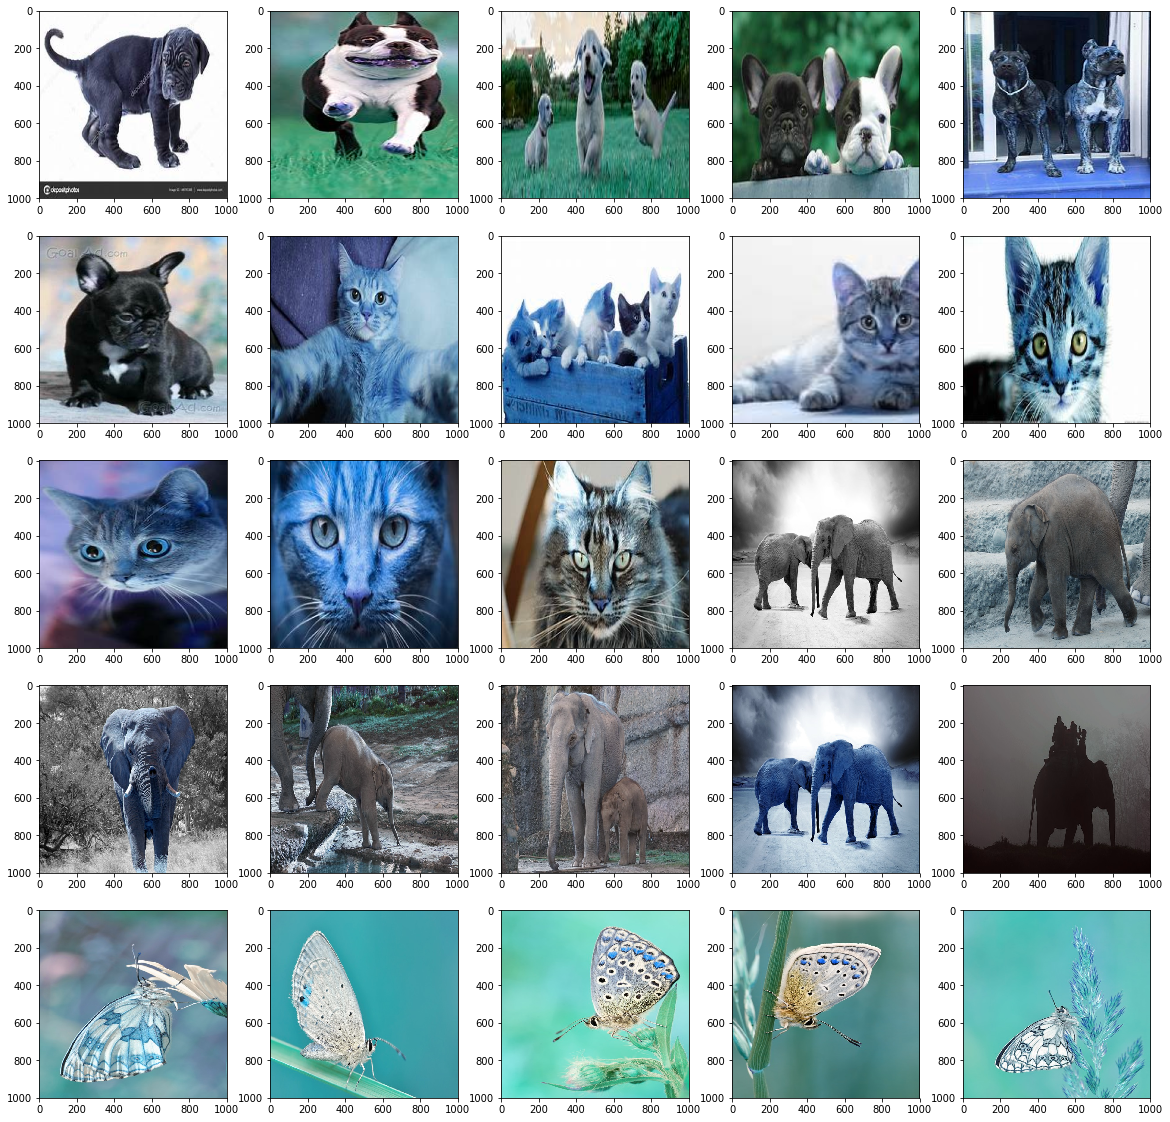

In [66]:
directory = r'G:/MS sem 2/Tensorflow/animals/raw-img/training/'

categories = {0:'dog', 1:'cat', 2:'elephant', 3:'butterfly', 4:'cow'}
training_data = []
training_label = []

for key, value in categories.items():
    cnt = 0
    path = os.path.join(directory + value)
    for img in os.listdir(path):
        if cnt > 6 :
            break
        img_array = cv2.imread(os.path.join(path,img))
        resize_array = cv2.resize(img_array, (1000,1000))
        img_label = key
        training_data.append(resize_array)
        training_label.append(img_label)
        cnt += 1

        

w=5
h=5
fig=plt.figure(figsize=(20,20))
columns = 5
rows = 5
for i in range(1, columns*rows+1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(training_data[i])
plt.show()

### Training

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(5, activation='softmax')
])


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [10]:
# RMSprop(lr=0.001)
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = RMSprop(lr=0.001), metrics=['acc'])

In [11]:
# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)




# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'G:/MS sem 2/Tensorflow/animals/raw-img/training',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        class_mode='sparse',
        classes = ['dog','elephant','cow','butterfly','cat'],
        shuffle =  True
        )

validation_generator = validation_datagen.flow_from_directory(
          r'G:/MS sem 2/Tensorflow/animals/raw-img/validation',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=64,
        class_mode='sparse',
        classes = ['dog','elephant','cow','butterfly','cat'],
        shuffle =  True
        )

Found 6984 images belonging to 5 classes.
Found 2439 images belonging to 5 classes.


In [13]:
history = model.fit_generator(
                              train_generator, 
                              steps_per_epoch=8,  
                              epochs=30,
                              verbose=1,
                              validation_data = validation_generator,
                              validation_steps=8
                             )

Epoch 1/30
8/8 [==============================] - 185s 23s/step - loss: 1.7977 - acc: 0.2526 - val_loss: 3.3823 - val_acc: 0.1973
Epoch 2/30
8/8 [==============================] - 122s 15s/step - loss: 1.7932 - acc: 0.2754 - val_loss: 1.5993 - val_acc: 0.2598
Epoch 3/30
8/8 [==============================] - 49s 6s/step - loss: 1.5451 - acc: 0.3271 - val_loss: 1.4926 - val_acc: 0.3398
Epoch 4/30
8/8 [==============================] - 54s 7s/step - loss: 1.5981 - acc: 0.2861 - val_loss: 1.5165 - val_acc: 0.3457
Epoch 5/30
8/8 [==============================] - 53s 7s/step - loss: 1.5062 - acc: 0.3584 - val_loss: 1.6502 - val_acc: 0.2715
Epoch 6/30
8/8 [==============================] - 50s 6s/step - loss: 1.5148 - acc: 0.3477 - val_loss: 1.4129 - val_acc: 0.3828
Epoch 7/30
8/8 [==============================] - 49s 6s/step - loss: 1.4777 - acc: 0.3799 - val_loss: 1.4770 - val_acc: 0.3594
Epoch 8/30
8/8 [==============================] - 94s 12s/step - loss: 1.3966 - acc: 0.4043 - val_lo